<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Random Forests - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [91]:
from sklearn.preprocessing import StandardScaler
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

# shape of data
print("data : " + str(X.shape))

# check if there's any empty columns
empty_columns = X.loc[:, X.isnull().sum() > 0]
cols = empty_columns.columns.tolist()
print("Number of empty columns: " + str(cols))

# check for different datatypes
X.dtypes

# look at the summary statistics
X.describe()

# look at the summary statistics
X.nunique()


data : (506, 13)
Number of empty columns: []


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

The score is:  0.6786434855761494


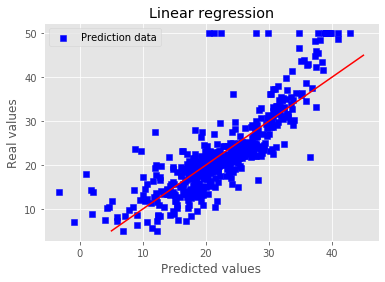

In [92]:
# Find most important features relative to target
data          = pd.DataFrame(boston.data)
data.columns  = boston.feature_names
data['MEDV'] = boston.target
column_predictors = np.abs(data.corr()['MEDV']).sort_values(ascending=False)[1:5].index.tolist()

# standarize the data in the chosen predictores
stdSc = StandardScaler()
X_std = X[column_predictors]
X_std = stdSc.fit_transform(X_std)

# Fit model and build the predictions
lreg = LinearRegression()
lreg.fit(X_std, y)

data['PREDICTION'] = lreg.predict(X_std)

# Score
lreg.score(X_std, y)
print('The score is: ', lreg.score(X_std, y))

# Plot predictions
plt.scatter(data['PREDICTION'], y, c = "blue", marker = "s", label = "Prediction data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([5, 45], [5, 45], c = "red")
plt.show()

The results tell us that there are many outliers and our model is mostly underfitting the data.


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

The score is:  0.7059686401172404


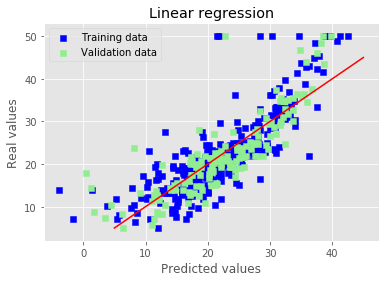

In [93]:
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X[column_predictors], y, test_size = 0.3, random_state = 2)

# standarize the data in the chosen predictores
train_means = X_train.mean()
train_stds  = X_train.std()

# standardize the training set
train_std = X_train - train_means
train_std /= train_stds

# and do the same for the test set
X_test -= train_means
X_test /= train_stds

# Fit model and build the predictions
lreg = LinearRegression()
lreg.fit(train_std, y_train)

y_train_pred = lreg.predict(train_std)
y_test_pred = lreg.predict(X_test)

# Score
lreg.score(X_test, y_test)
print('The score is: ', lreg.score(X_test, y_test))

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([5, 45], [5, 45], c = "red")
plt.show()

The score is:  0.6583080795167716


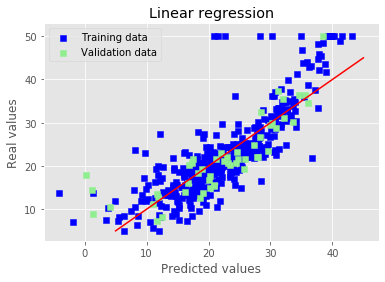

In [94]:
# 90/10 train/test split
X_train, X_test, y_train, y_test = train_test_split(X[column_predictors], y, test_size = 0.1, random_state = 2)

# standarize the data in the chosen predictores
train_means = X_train.mean()
train_stds  = X_train.std()

# standardize the training set
train_std = X_train - train_means
train_std /= train_stds

# and do the same for the test set
X_test -= train_means
X_test /= train_stds

# Fit model and build the predictions
lreg = LinearRegression()
lreg.fit(train_std, y_train)

y_train_pred = lreg.predict(train_std)
y_test_pred = lreg.predict(X_test)

# Score
lreg.score(X_test, y_test)
print('The score is: ', lreg.score(X_test, y_test))

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([5, 45], [5, 45], c = "red")
plt.show()

The prediction score decreases the smaller the test size but overall is higher than fitting without a test and training set. 

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [95]:
lreg = LinearRegression()

# Using k-fold cross validation for folds of 5 and 10
cv_scores = []
num_folds = [5, 10]

for fold in num_folds:
    scores = cross_val_score(estimator=lreg, X=train_std, y=y_train, cv=fold)
    cv_scores.append(scores)
    
cv_dict = {}
for idx, fold in enumerate(num_folds):
    cv_dict[f'folds: {fold}'] = np.mean(cv_scores[idx])

cv_dict

{'folds: 5': 0.6632750791229907, 'folds: 10': 0.6548159853642022}

In [ ]:
The variance seems to be very minor, seems the more folds the lower the score. 

## Using Random Forests With the Boston Dataset

#### Create X and y variables for Your Data

In [66]:
from sklearn.ensemble import RandomForestRegressor

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

#### Divide it into a training and test set

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

#### Fit a Random Forest on the data

/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/207454/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

(0.8222485453410933, 0.2)


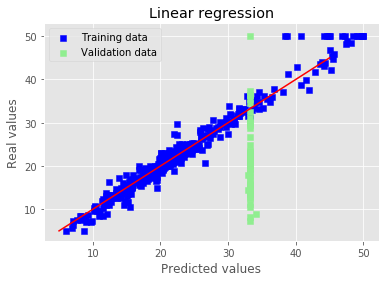

In [98]:
sample_size = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rf_scores   = []
rf = RandomForestRegressor()

# do the cross validation
for size in sample_size:
    rf.set_params(max_features=size)
    scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
    rf_scores.append((np.mean(scores), size))

max(rf_scores)
print(str(max(rf_scores)))
rf.set_params(max_features=0.2)
rf.fit(X_train, y_train)

rf_preds_train = rf.predict(X_train)
rf_preds = rf.predict(X_test)

# Plot predictions
plt.scatter(rf_preds_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_preds, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([5, 45], [5, 45], c = "red")
plt.show()

#### What are its most important features?

#### How well does your model perform on your test set?

#### Challenge:  Try and find at least two improvements to your model to improve test scores.

You can try the following:
 - increasing the number of trees
 - using a different number of maximum features to sample
 - using a different number of minimum samples per leaf

['LSTAT', 'RM', 'PTRATIO', 'INDUS']

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [77]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX",
    "case4": "MEDV ~ LSTAT + RM + PTRATIO + INDUS"
}

model = smf.ols(formula=formulas['case4'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     264.5
Date:                Thu, 12 Mar 2020   Prob (F-statistic):          5.41e-122
Time:                        18:10:39   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     501   BIC:                             3137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6150      3.927      4.741      0.000      10.900      26.330
LSTAT         -0.5757      0.048    -12.023      0.000      -0.670      -0.482
RM             4.5152      0.426     10.592      0.000       3.678       5.353
PTRATIO       -0.9351      0.120     -7.763      0.000      -1.172      -0.698
INDUS          0.0076      0.044      0.174      0.862      -0.078       0.093
==============================================================================
Omnibus:                      200.524   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.887
Skew:                           1.689   Prob(JB):                    1.02e-218
Kurtosis:                       9.017   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

In [ ]:
# Check out Pearson scores
